In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# вывод gray избражения
def show_gray_img(img):
    plt.subplots(figsize=(7,7))
    plt.imshow(X=img, cmap='gray') 
    plt.show()

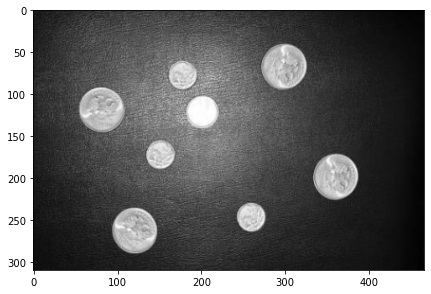

In [3]:
img = cv2.imread(filename='coins.png',flags=cv2.IMREAD_GRAYSCALE)
show_gray_img(img)

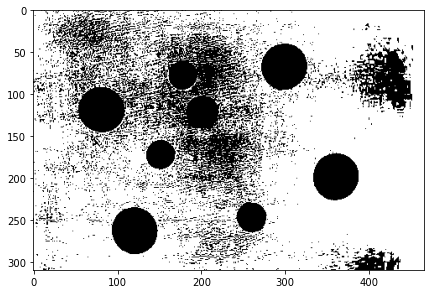

In [4]:
# бинаризация
threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV, 151,1)
show_gray_img(threshold)

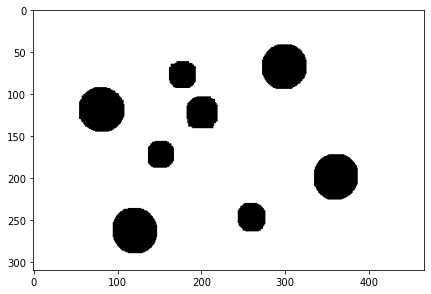

In [5]:
#удаление шума
kernel = np.ones(shape=(3,3), dtype=np.uint8) 
close = cv2.morphologyEx(src=threshold, op=cv2.MORPH_CLOSE, kernel=kernel, iterations = 7) 
show_gray_img(close)

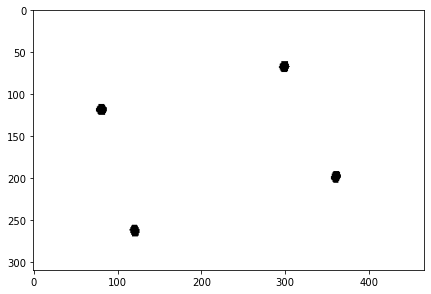

In [6]:
# области больших монеток
circle = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE,ksize=(11,11));
# show_gray_img(circle)
big_object = cv2.dilate(close,circle,iterations=4)
show_gray_img(big_object)

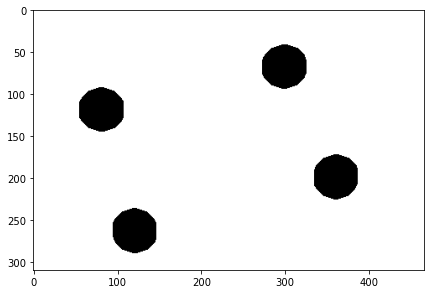

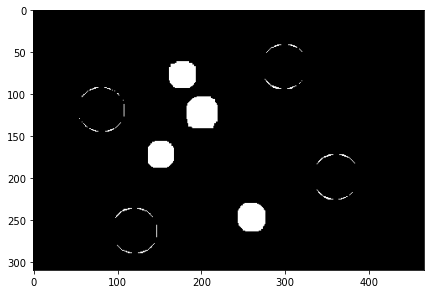

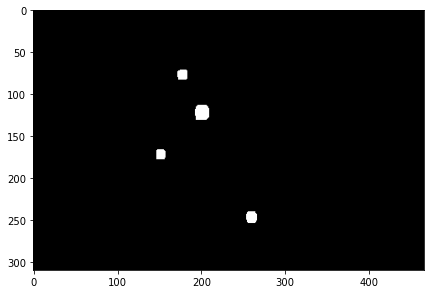

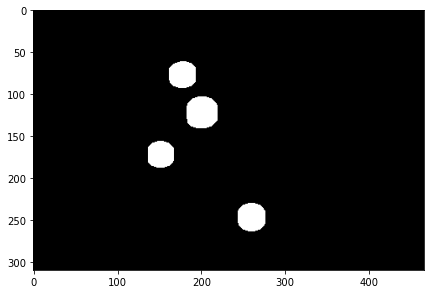

In [7]:
# области маленьких монеток
big_object_revers = cv2.erode(big_object,circle,iterations=4)
show_gray_img(big_object_revers)
small_object = close - big_object_revers
show_gray_img(small_object)
small_object = cv2.erode(small_object,circle,iterations=2)
show_gray_img(small_object)
small_object_revers = cv2.dilate(small_object,circle,iterations=2)
show_gray_img(small_object_revers)

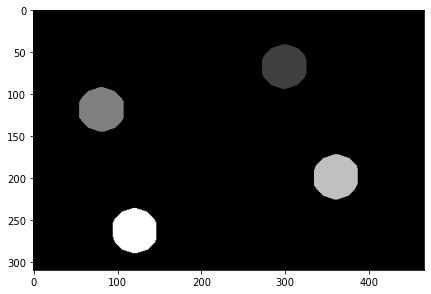

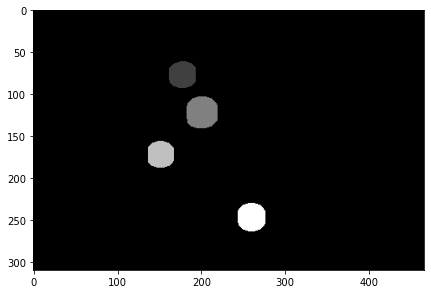

In [8]:
# связные компоненты
big_object_n = big_object_revers + 1
small_object_n = small_object_revers
count_big, big_object_n = cv2.connectedComponents(big_object_n)
count_small, small_object_n = cv2.connectedComponents(small_object_n)
show_gray_img(big_object_n)
show_gray_img(small_object_n)

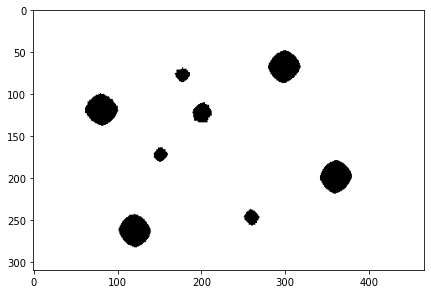

In [9]:
# определение конечной фоновой области
background = cv2.dilate(src=threshold, kernel=kernel, iterations=7)
show_gray_img(background)

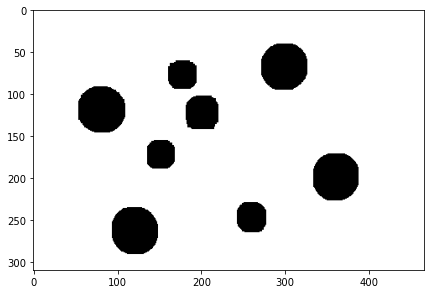

In [10]:
# определение нахождения объектов
erode = cv2.erode(src=close, kernel=kernel, iterations=1)
show_gray_img(erode)

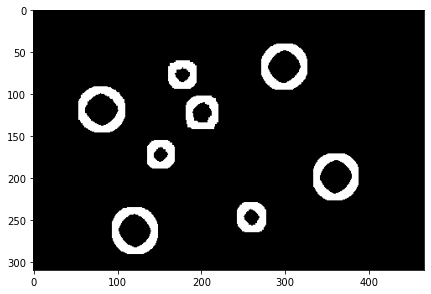

In [11]:
# определение неизвестных регионов
figures = np.uint8(erode)
unknown_regions = cv2.subtract(src1=background, src2=figures)
show_gray_img(unknown_regions)

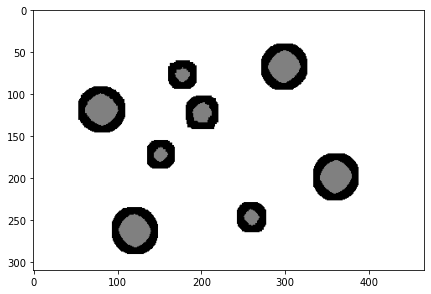

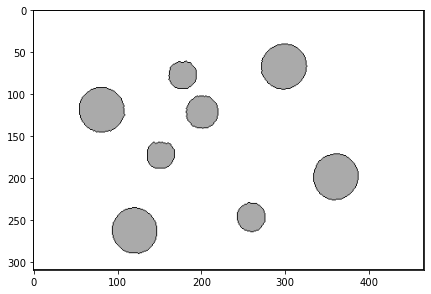

In [12]:
# маркеровка
ret, markers = cv2.connectedComponents(image=figures)
# сдвиг на 1, чтобы не было 0
markers = markers + 1
# неивестные области отмечаем 0
markers[unknown_regions==255] = 0
show_gray_img(markers)
# применяем водораздел
img_bgr = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(image=img_bgr, markers=markers)
show_gray_img(markers)
img_bgr[markers == -1] = [255, 0, 0] 

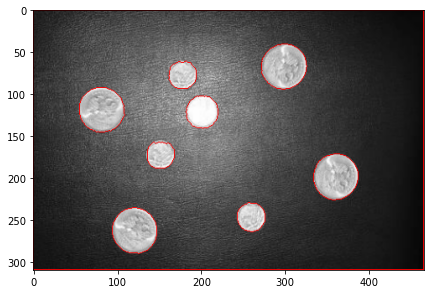

Общее количество:	 8
Количество больших:	 4
Количество маленьких:	 4


In [13]:
# постановка задачи: выделить и посчитать монеты: общее количетсво, большие отдельно, маленькие отдельно
show_gray_img(img_bgr)
print("Общее количество:\t", count_big + count_small - 2)
print("Количество больших:\t", count_big - 1)
print("Количество маленьких:\t", count_small - 1)